In [22]:
import pandas as pd;
import matplotlib.pyplot as plt;

In [15]:
df=pd.read_csv('/IPL_player_performance_analysis/Batting_data_cleaned/Batting_data_cleaned.csv')
# For scores over 30, 50, and 100
df['over_30'] = df['runs'] > 30
df['over_50'] = df['runs'] > 50
df['over_100'] = df['runs'] > 100

# Group by the player's name and sum each column
player_scores = df.groupby('name')[['over_30', 'over_50', 'over_100']].sum()
player_scores = player_scores[player_scores['over_30'] > 0]
# Rename the columns
player_scores = player_scores.rename(columns={
    'over_30': 'Scores > 30',
    'over_50': 'Scores > 50',
    'over_100': 'Scores > 100'
})

# Display the result
print("Players who have scored above 30")
print(player_scores)


Players who have scored above 30
                 Scores > 30  Scores > 50  Scores > 100
name                                                   
A Ashish Reddy             2            0             0
A Badoni                   2            1             0
A Manohar                  3            0             0
A Mishra                   1            0             0
A Symonds                 13            5             1
...                      ...          ...           ...
Y Venugopal Rao           10            3             0
YBK Jaiswal               18            7             1
YK Pathan                 37           14             0
YV Takawale                2            0             0
Yuvraj Singh              34           12             0

[280 rows x 3 columns]


In [18]:
# Filter rows where Runs are above 50
altered_df = df[df['runs'] > 50]

# Create a new DataFrame
result_df = altered_df[['name', 'runs', 'strikeRate']]

print("Table of Players with Scores Above 50:")
print(result_df)


Table of Players with Scores Above 50:
               name  runs  strikeRate
1        RD Gaikwad  92.0      184.00
10     Shubman Gill  63.0      175.00
33        KR Mayers  73.0      192.10
41        DA Warner  56.0      116.66
51      YBK Jaiswal  54.0      145.94
...             ...   ...         ...
15619      NK Patel  57.0      146.15
15630     SR Watson  52.0      179.31
15659      PA Patel  51.0      106.25
15661      SK Raina  55.0      161.76
15673     YK Pathan  56.0      143.58

[1536 rows x 3 columns]


In [20]:
# average strike rate for scores above 50
above_50_avg_strike_rate = df[df['runs'] > 50]['strikeRate'].mean()

# average strike rate for scores below or equal to 50
below_50_avg_strike_rate = df[df['runs'] <= 50]['strikeRate'].mean()

# the results 
comparison_df = pd.DataFrame({
    'Condition': ['Scores Above 50', 'Scores Below or Equal to 50'],
    'Average Strike Rate': [above_50_avg_strike_rate, below_50_avg_strike_rate]
})

print("Comparison of Average Strike Rates:")
print(comparison_df)


Comparison of Average Strike Rates:
                     Condition  Average Strike Rate
0              Scores Above 50           161.092975
1  Scores Below or Equal to 50           106.041079


In [21]:
# Filter for batsmen who faced at least 15 balls
filtered_df = df[df['ballsFaced'] >= 15]

# Get the top 15 batsmen with highest strike rates
top_batsmen = filtered_df.nlargest(15, 'strikeRate')

# Calculate average strike rates for scores above and below 50
above_50_avg_strike_rate = top_batsmen[top_batsmen['runs'] > 50]['strikeRate'].mean()
below_or_equal_50_avg_strike_rate = top_batsmen[top_batsmen['runs'] <= 50]['strikeRate'].mean()

# Prepare the results for display
comparison_df = pd.DataFrame({
    'Condition': ['Scores Above 50', 'Scores Below or Equal to 50'],
    'Average Strike Rate': [above_50_avg_strike_rate, below_or_equal_50_avg_strike_rate]
})

print("Comparison of Average Strike Rates for Top 15 Batsmen:")
print(comparison_df)


Comparison of Average Strike Rates for Top 15 Batsmen:
                     Condition  Average Strike Rate
0              Scores Above 50              318.112
1  Scores Below or Equal to 50              286.440


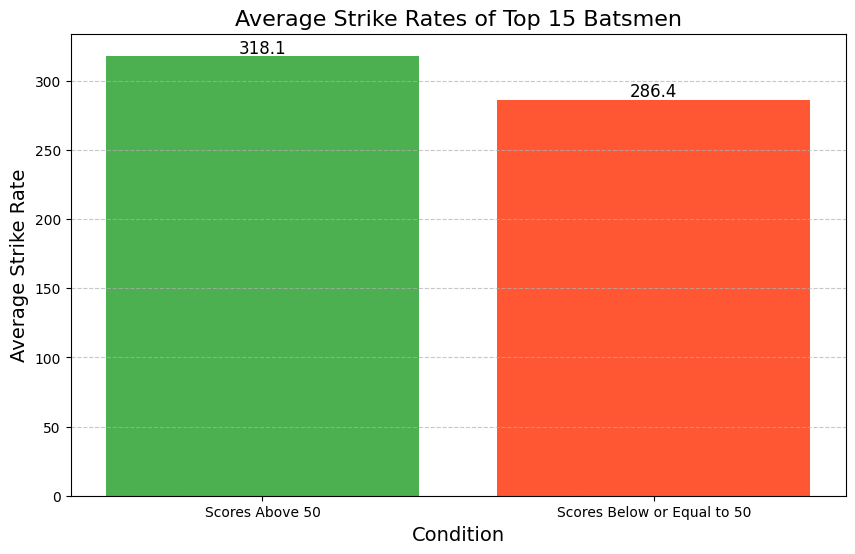

In [28]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Condition'], comparison_df['Average Strike Rate'], color=['#4CAF50', '#FF5733'])
plt.title('Average Strike Rates of Top 15 Batsmen', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Average Strike Rate', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with their values
for index, value in enumerate(comparison_df['Average Strike Rate']):
    plt.text(index, value + 2, f'{value:.1f}', ha='center', fontsize=12)

plt.show()
